# **Abu Bin Fahd**
## Batch: GRIPJULY22
## Tak: 06

# Create dicision tree classifier and represent it visually.

In [118]:
# import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
# load dataset
from sklearn import datasets
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [120]:
# get the keys of dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [121]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [122]:
# descriptive statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Analysing the distributions of sepal and petal dimensions

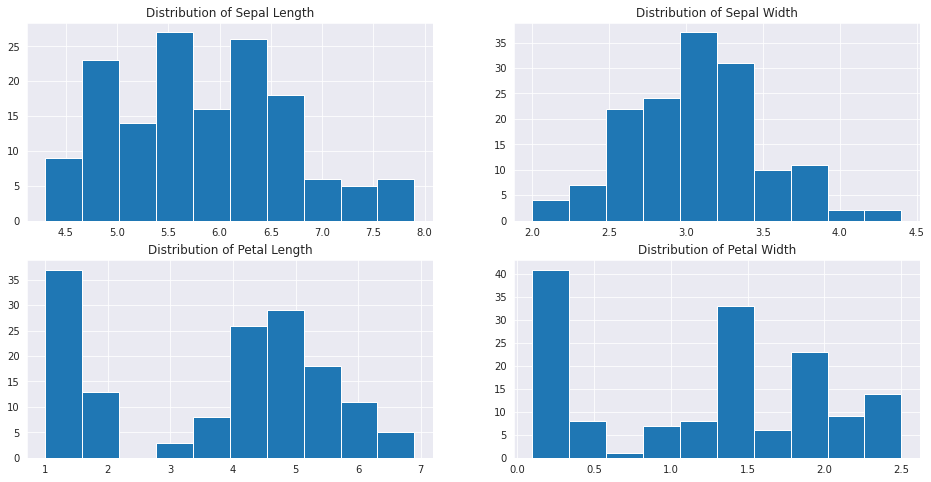

In [123]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#plot for sepal length
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(df["sepal length (cm)"]);

#plot for sepal width
axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(df["sepal width (cm)"]);

#plot for petal length
axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(df["petal length (cm)"]); 

#plot for petal width
axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(df["petal width (cm)"]);

It isobserved that sepal width follows normal distribution, while sepal length is lightly right skewed.

# Visualising the sepal and petal dimensions

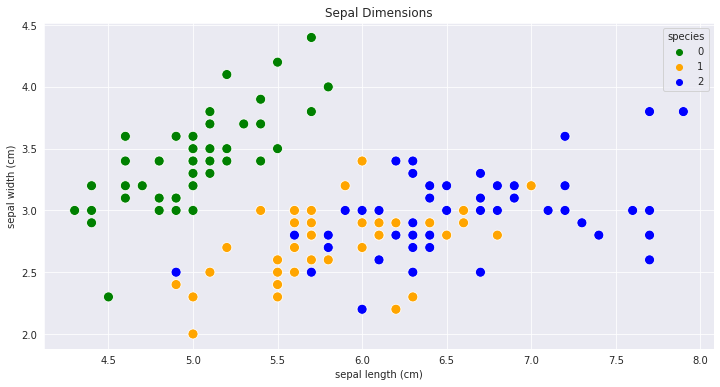

In [124]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=df["sepal length (cm)"], 
                y=df["sepal width (cm)"], 
                hue=df["species"],palette = ["green","orange","blue"],
                s=100);

The plt gives information the species "0" has small sepal length and large sepal width and where species "2" has large sepal length and small sepal width. In some cases it is very difficult is classify species "1" and species "2" they almost have same sepal dimentions. Here it is easy to seperate species "0" from the other species with linear boundary, but it is not possible to seperate species "1" and "2" with linear boundary and hence requires complex boundary for seperaton.

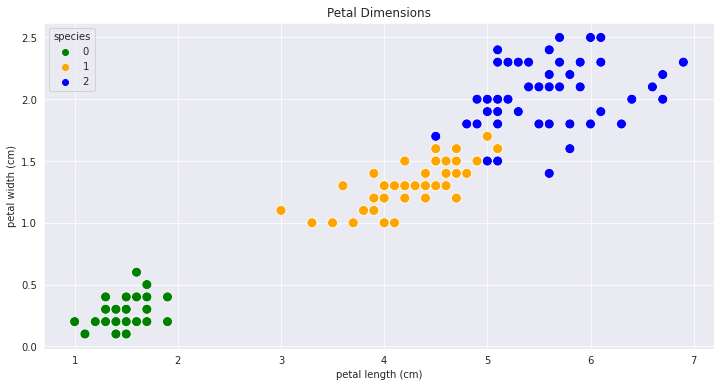

In [125]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=df["petal length (cm)"], 
                y=df["petal width (cm)"], 
                hue=df["species"],palette = ["green","orange","blue"],
                s=100);

Here species "0" has small petal length and petal width while opposite holds true for species "2". It can be observed that there is linear relationship between petal length and petal width for all species.

# Analysing correlation between feature and Target

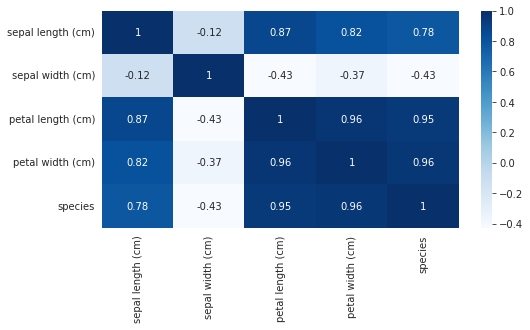

In [126]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='Blues');

The plot insightes that Petal width and length are highly correlated, while the sepal length and width are not correlated.

# Splitting dataset and model evaluation

In [127]:
# creating feature and target variable
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y = df.species

In [128]:
# spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("The accuracy of Decision Tree is:", accuracy_score(y_pred, y_test))

The accuracy of Decision Tree is: 0.9


The accuracy of Decision Tree is: 0.93.
Test accuracy is 93%, hence we can now fit the model for entire data and test for the new data.

Let us visualize the Decision Tree to understand it better

In [130]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 62 not upgraded.


In [131]:
!pip install --upgrade scikit-learn==0.22

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [132]:
# Alternative 1
# # Import necessary libraries for graph viz
# from sklearn.externals.six import StringIO  
# # from io import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus

# # Visualize the graph
# dot_data = StringIO()
# export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png())

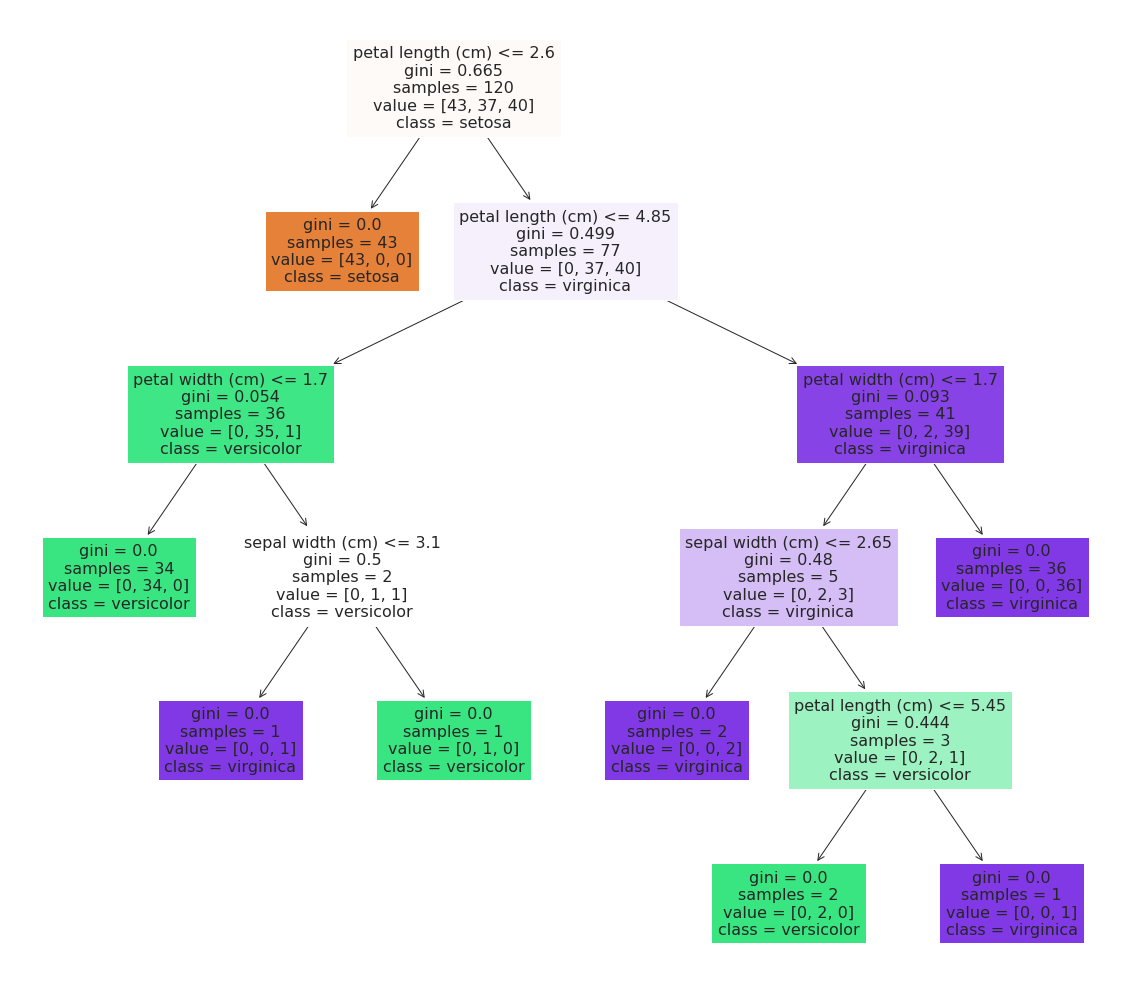

In [133]:
from sklearn import tree

fig = plt.figure(figsize=(20,18))
_ = tree.plot_tree(dt, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [134]:
# Alternative 2
# import graphviz
# # DOT data
# dot_data = tree.export_graphviz(dt, out_file=None, 
#                                 feature_names=iris.feature_names,  
#                                 class_names=iris.target_names,
#                                 filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph